In [4]:
import os, sys
ROOT = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if ROOT not in sys.path:
    sys.path.append(ROOT)
    
import src as src
from src import config, data_utils, preprocessing

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
app_train, app_test, column_descriptions = data_utils.get_datasets()

In [7]:
print(f"Train dataset shape: {app_train.shape}")

Train dataset shape: (50000, 54)


In [8]:
pd.set_option('display.max_columns', None)
display(app_train.head())


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [9]:
with pd.option_context(
    'display.max_rows', None,
    'display.max_columns', None,
    'display.width', None,
    'display.max_colwidth', None
):
    display(app_train.head(5).T)

,0,1,2,3,4
ID_CLIENT,1,2,3,4,5
CLERK_TYPE,C,C,C,C,C
PAYMENT_DAY,5,15,5,20,10
APPLICATION_SUBMISSION_TYPE,Web,Carga,Web,Web,Web
QUANT_ADDITIONAL_CARDS,0,0,0,0,0
POSTAL_ADDRESS_TYPE,1,1,1,1,1
SEX,F,F,F,F,M
MARITAL_STATUS,6,2,2,2,2
QUANT_DEPENDANTS,1,0,0,0,0
EDUCATION_LEVEL,0,0,0,0,0


 TARGET  count  percentage
      0  36959      73.918
      1  13041      26.082


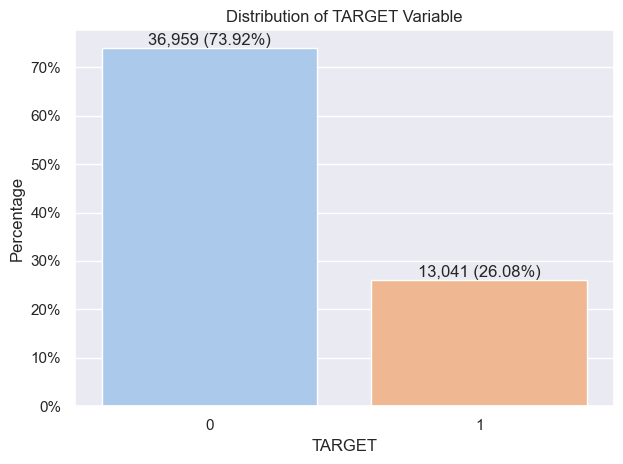

In [10]:
# Distribution of Target Variable (TARGET_LABEL_BAD=1)
app_train = app_train.rename(columns={'TARGET_LABEL_BAD=1': 'TARGET'})
target = app_train['TARGET']

summary = (target.value_counts()
           .rename('count')
           .to_frame()
           .assign(percentage=lambda df: df['count'] / df['count'].sum() * 100)
           .sort_index()
           .reset_index().rename(columns={'index': 'TARGET'}))
print(summary.to_string(index=False))

sns.set_theme()
ax = sns.barplot(data=summary, x='TARGET', y='percentage', palette='pastel')
ax.set_title('Distribution of TARGET Variable')
ax.set_xlabel('TARGET')
ax.set_ylabel('Percentage')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
for i, row in summary.iterrows():
    ax.text(i, row['percentage'], f"{int(row['count']):,} ({row['percentage']:.2f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [11]:
# Showing number of columns by data type
(app_train.dtypes.astype(str).value_counts().rename_axis('dtype').to_frame('Columns'))

,Columns
dtype,
int64,25
object,20
float64,9


In [12]:
# Display amount of unique values for each categorical variable
cat_columns = app_train.select_dtypes(include=['object', 'category']).columns
n_labels = (app_train[cat_columns].nunique(dropna=True).sort_values(ascending=False))
n_labels.to_frame('Labels')


,Labels
RESIDENCIAL_BOROUGH,14511
CITY_OF_BIRTH,9910
PROFESSIONAL_BOROUGH,5057
RESIDENCIAL_CITY,3529
PROFESSIONAL_CITY,2236
PROFESSIONAL_ZIP_3,794
RESIDENCIAL_ZIP_3,794
RESIDENCIAL_PHONE_AREA_CODE,102
PROFESSIONAL_PHONE_AREA_CODE,87
STATE_OF_BIRTH,29


In [13]:
# Checking for missing values
missing_data = app_train.isna().mean().sort_values(ascending=False)
missing_data.head(20).to_frame('Missing Ratio')

,Missing Ratio
PROFESSIONAL_CITY,0.67566
PROFESSIONAL_BOROUGH,0.67566
EDUCATION_LEVEL_1,0.64676
MATE_PROFESSION_CODE,0.57768
PROFESSION_CODE,0.15512
OCCUPATION_TYPE,0.14626
MONTHS_IN_RESIDENCE,0.07554
RESIDENCE_TYPE,0.02698
PROFESSIONAL_PHONE_AREA_CODE,0.00000
QUANT_SPECIAL_BANKING_ACCOUNTS,0.00000


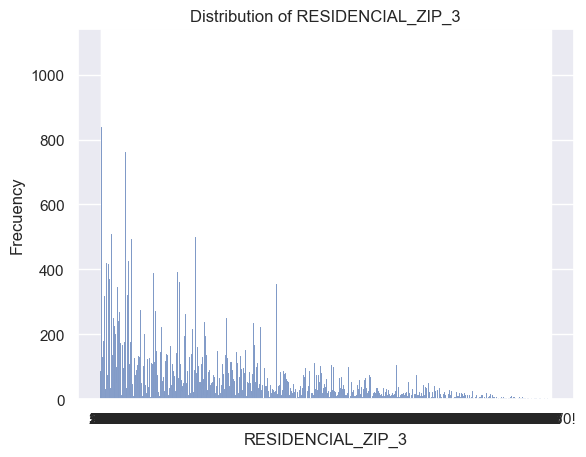

In [13]:
# Distribution of Residencial ZIP 
ax = sns.histplot(app_train['RESIDENCIAL_ZIP_3'], bins=10)
ax.set_title('Distribution of RESIDENCIAL_ZIP_3')
ax.set_xlabel('RESIDENCIAL_ZIP_3')
ax.set_ylabel('Frecuency')
ax.set_yscale('linear')
plt.show()

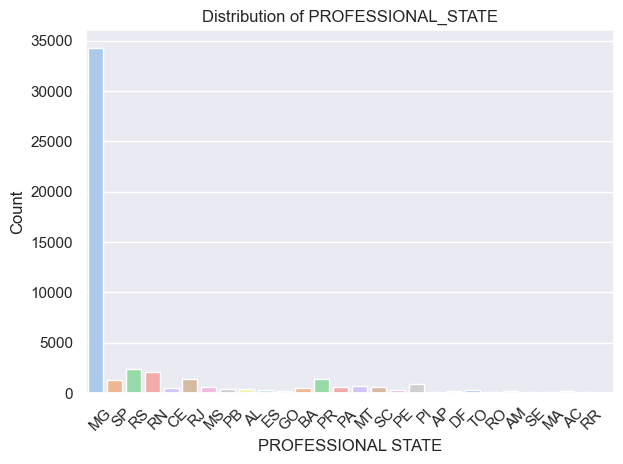

In [22]:
# Professional State
ax = sns.countplot(data=app_train, x='PROFESSIONAL_STATE', palette='pastel')
ax.set_title('Distribution of PROFESSIONAL_STATE')
ax.set_xlabel('PROFESSIONAL STATE')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

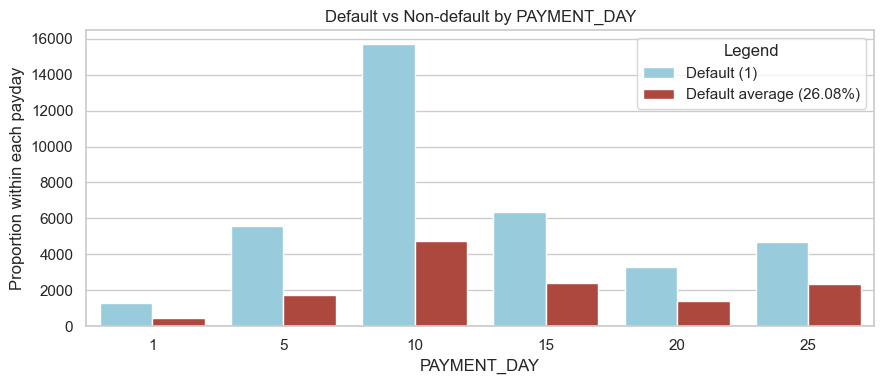

In [17]:
# Payment day vs Target
# Count and proportion by payday and target

payment_day_comp = (
    app_train.groupby(['PAYMENT_DAY', 'TARGET'])
    .size()
    .reset_index(name='count')
)
payment_day_comp['prop'] = payment_day_comp['count'] / payment_day_comp.groupby('PAYMENT_DAY')['count'].transform('sum')

avg_default = app_train['TARGET'].mean()

fig, ax = plt.subplots(figsize=(9,4))
sns.barplot(
    data=payment_day_comp,
    x='PAYMENT_DAY',
    #y='prop',
    y='count',
    hue='TARGET',
    palette={0: '#8dd1e7', 1: '#c0392b'},
    ax=ax
)
#ax.axhline(avg_default, color='red', linestyle='--', label=f'Promedio default ({avg_default:.2%})')
ax.set_ylabel('Proportion within each payday')
ax.set_xlabel('PAYMENT_DAY')
ax.set_title('Default vs Non-default by PAYMENT_DAY')
#ax.set_ylim(0, 1)
handles, labels = ax.get_legend_handles_labels()
# Adjusts TARGET=0/1 labels and maintains the average line
#custom_labels = ['No default (0)', 'Default (1)', f'Default average ({avg_default:.2%})']
custom_labels = ['Default (1)', f'Default average ({avg_default:.2%})']
ax.legend(handles=handles + [ax.lines[-1]], labels=custom_labels, title='Legend')
plt.tight_layout()
plt.show()

In [26]:
sns.set(style="whitegrid")
avg_default = app_train['TARGET'].mean()

# Reusable color palettes
palette_default = {0: "#8dbeb0", 1: '#c0392b'}         # green/marron
palette_blues = {0: '#90caf9', 1: '#1565c0'}            # blues
palette_blue_red = {0: '#8dd1e7', 1: '#c0392b'}
palette_greys = {0: '#b0bec5', 1: '#455a64'}            # grays
palette_pinks = {0: '#f8bbd0', 1: '#c2185b'}            # pinks
palette_oranges = {0: "#9cc25e", 1: '#ef6c00'}          # oranges
palette_greens = {0: "#e2ae8a", 1: "#607b62"}             # greens/orange
palette_purples = {0: "#d89454", 1: "#b4b237"}              # purples/yellow

def plot_stacked(df, cat_col, title, order=None, figsize=(10,4), palette=None):
    palette = palette or palette_default 
    counts = (
        df.groupby([cat_col, 'TARGET'])
          .size()
          .reset_index(name='count')
    )
    counts['prop'] = counts['count'] / counts.groupby(cat_col)['count'].transform('sum')
    if order is not None:
        counts[cat_col] = pd.Categorical(counts[cat_col], categories=order, ordered=True)
    fig, ax = plt.subplots(figsize=figsize)
    #sns.barplot(data=counts, x=cat_col, y='prop', hue='TARGET', palette=palette, ax=ax)
    sns.barplot(data=counts, x=cat_col, y='count', hue='TARGET', palette=palette, ax=ax)
    #ax.axhline(avg_default, color='red', linestyle='--', label=f'Promedio default ({avg_default:.2%})')
    ax.set_title(title)
    ax.set_ylabel('Proporción en el grupo')
    ax.set_xlabel(cat_col)
    #ax.set_ylim(0,1)
    handles, labels = ax.get_legend_handles_labels()
    #custom_labels = ['No default (0)', 'Default (1)', f'Promedio default ({avg_default:.2%})']
    custom_labels = ['Default (1)', f'Default average ({avg_default:.2%})']
    ax.legend(handles=handles + [ax.lines[-1]], labels=custom_labels, title='Leyenda', loc='lower right')
    plt.tight_layout()
    plt.show()

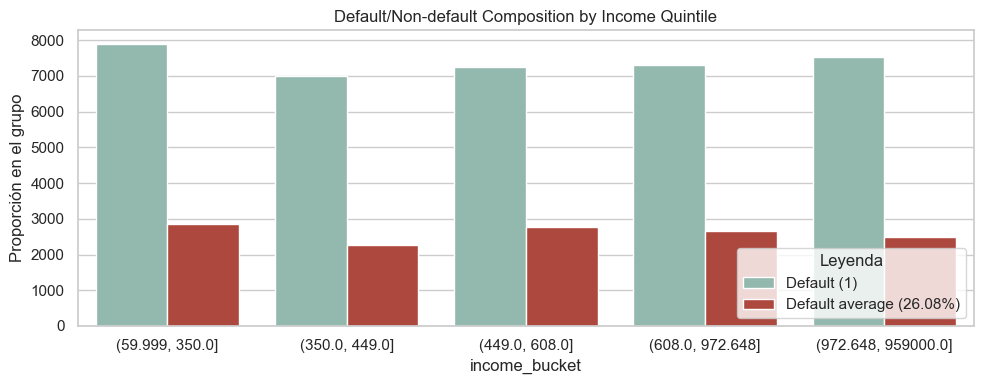

In [27]:
# Income quintiles

app_train['total_income'] = app_train['PERSONAL_MONTHLY_INCOME'].fillna(0) + app_train['OTHER_INCOMES'].fillna(0)
app_train['income_bucket'] = pd.qcut(app_train['total_income'], 5, duplicates='drop')
plot_stacked(app_train, 'income_bucket', 'Default/Non-default Composition by Income Quintile')


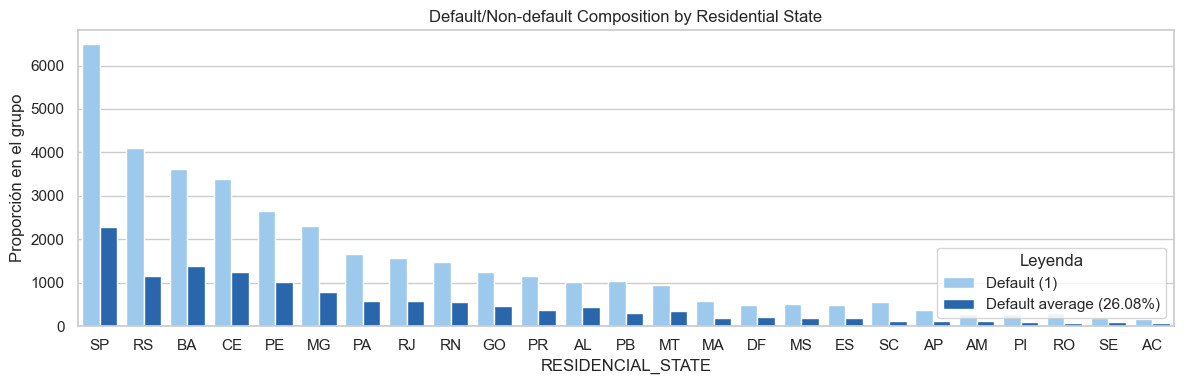

In [19]:
state_order = (
    app_train['RESIDENCIAL_STATE']
    .value_counts()
    .loc[lambda s: s >= 200]  # Frequency threshold
    .index
)
plot_stacked(app_train[app_train['RESIDENCIAL_STATE'].isin(state_order)],
             'RESIDENCIAL_STATE',
             'Default/Non-default Composition by Residential State',
             order=state_order,
             figsize=(12,4),
             palette=palette_blues)

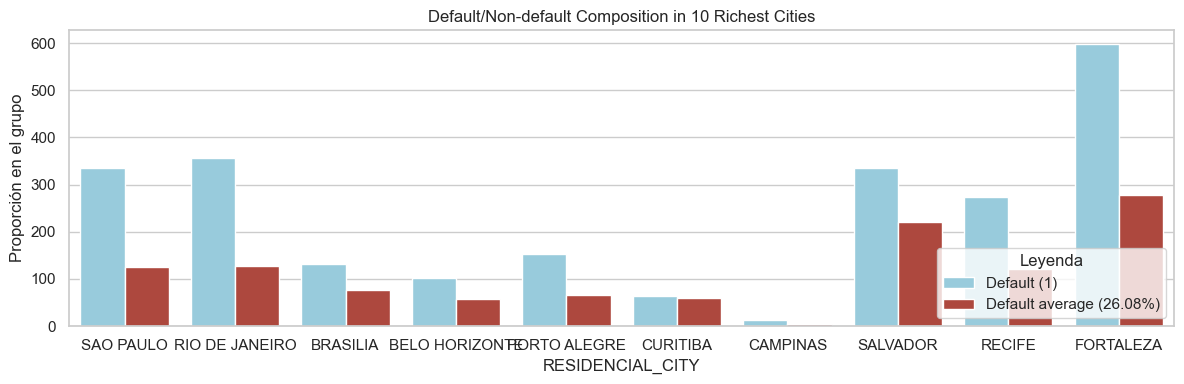

In [24]:
rich_cities = pd.DataFrame([
    ('SP', 'SAO PAULO'),
    ('RJ', 'RIO DE JANEIRO'),
    ('DF', 'BRASILIA'),
    ('MG', 'BELO HORIZONTE'),
    ('RS', 'PORTO ALEGRE'),
    ('PR', 'CURITIBA'),
    ('SP', 'CAMPINAS'),
    ('BA', 'SALVADOR'),
    ('PE', 'RECIFE'),
    ('CE', 'FORTALEZA'),
], columns=['RESIDENCIAL_STATE','RESIDENCIAL_CITY'])

mask = app_train.merge(rich_cities, on=['RESIDENCIAL_STATE','RESIDENCIAL_CITY'], how='inner')
city_order = rich_cities['RESIDENCIAL_CITY']
plot_stacked(mask, 'RESIDENCIAL_CITY',
             'Default/Non-default Composition in 10 Richest Cities',
             order=city_order,
             figsize=(12,4),
             palette=palette_blue_red)


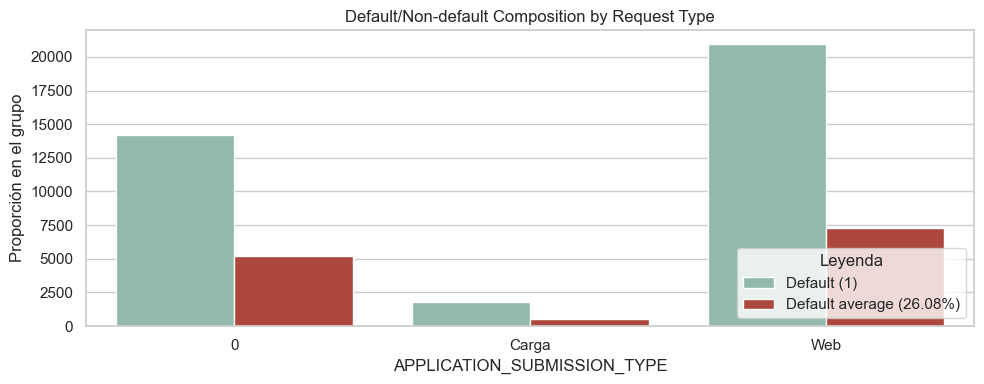

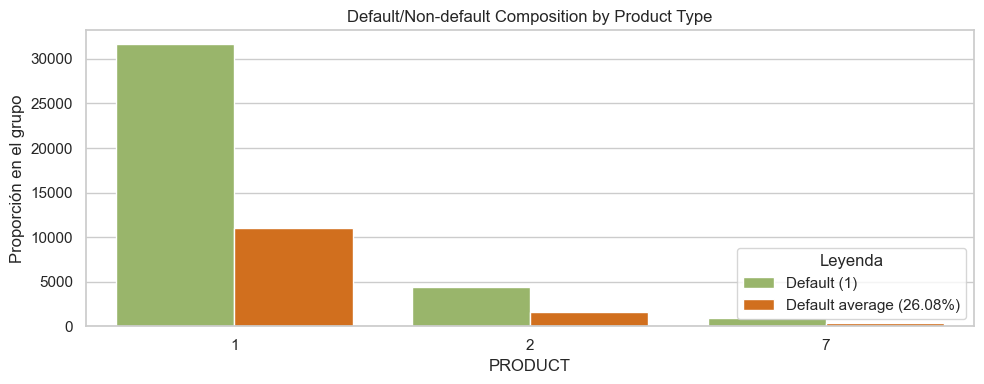

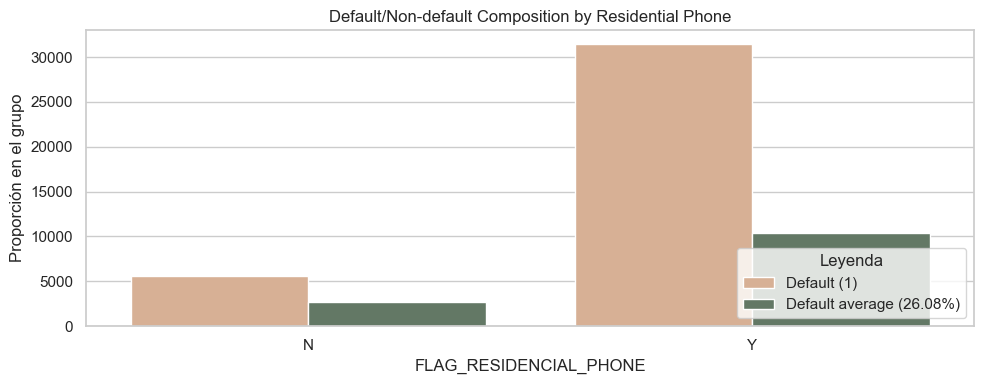

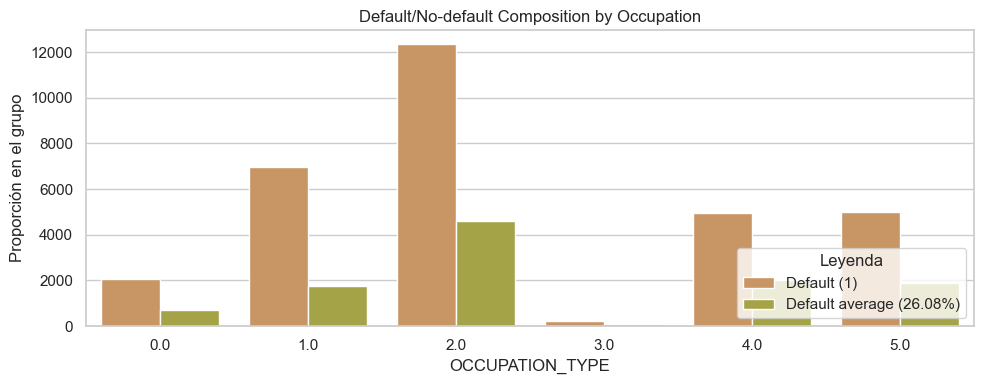

In [28]:
# Other categorical variables
# Default composition by request type
plot_stacked(app_train, 'APPLICATION_SUBMISSION_TYPE',
             'Default/Non-default Composition by Request Type')

# Default composition by product type
plot_stacked(app_train, 'PRODUCT',
             'Default/Non-default Composition by Product Type', palette=palette_oranges)

# Default composition by residential phone
plot_stacked(app_train, 'FLAG_RESIDENCIAL_PHONE',
             'Default/Non-default Composition by Residential Phone', palette=palette_greens)

# Default composition by occupation type
plot_stacked(app_train, 'OCCUPATION_TYPE',
             'Default/No-default Composition by Occupation', palette=palette_purples)
